In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("C:\\Users\\Mpatt\\OneDrive\\Desktop\\AssignmentDATASet\\Dataset.csv")
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [3]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# Handle missing values
df.fillna(method='ffill', inplace=True)
data= df.replace("�", "",  regex=True)
print(data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208           stanbul   
9547        5908749                Ceviz Aac۱           208           stanbul   
9548        5915807                     Huqqa           208           stanbul   
9549        5916112                  Ak Kahve           208           stanbul   
9550        5927402  Walter's Coffee Roastery           208           stanbul   

                           

C:\Users\Mpatt\AppData\Local\Temp\ipykernel_15444\1710471128.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
  # Data Preprocessing
clean_data=data.drop(['Restaurant ID','Restaurant Name','Country Code','City','Address', 'Locality','Locality Verbose','Longitude','Latitude','Cuisines','Currency'], axis=1)
print(clean_data.columns)

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')


In [6]:
clean_data.shape
clean_data.info

<bound method DataFrame.info of       Average Cost for two Has Table booking Has Online delivery  \
0                     1100               Yes                  No   
1                     1200               Yes                  No   
2                     4000               Yes                  No   
3                     1500                No                  No   
4                     1500               Yes                  No   
...                    ...               ...                 ...   
9546                    80                No                  No   
9547                   105                No                  No   
9548                   170                No                  No   
9549                   120                No                  No   
9550                    55                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                   No                   No            3               4.

In [7]:
clean_data.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [8]:
clean_data.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
clean_data.duplicated().sum()
clean_data.dropna(inplace=True)

<Axes: xlabel='Price range'>

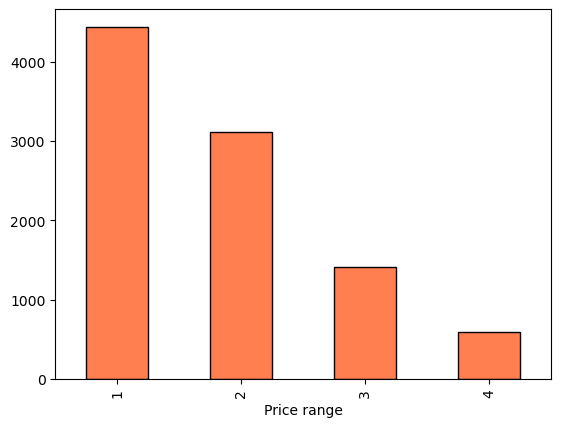

In [10]:
clean_data['Price range'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')

C:\Users\Mpatt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price range', ylabel='Count'>

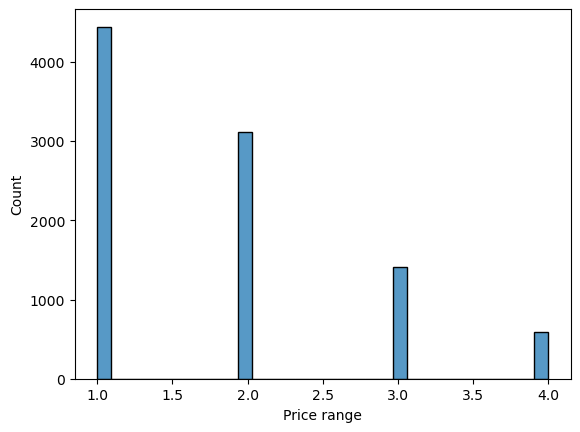

In [11]:
sns.histplot(clean_data['Price range'])

<Axes: ylabel='Frequency'>

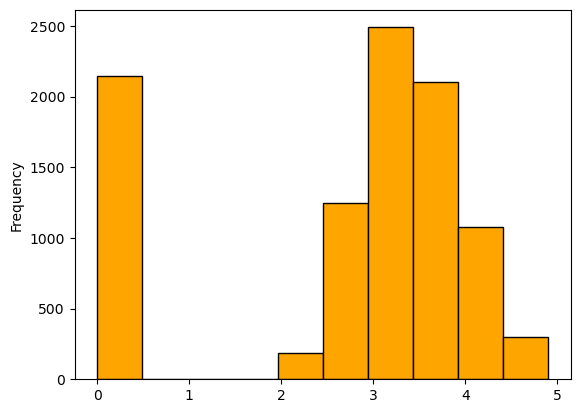

In [12]:
clean_data['Aggregate rating'].plot(kind='hist', bins=10, color='orange', edgecolor='black')

<Axes: ylabel='Density'>

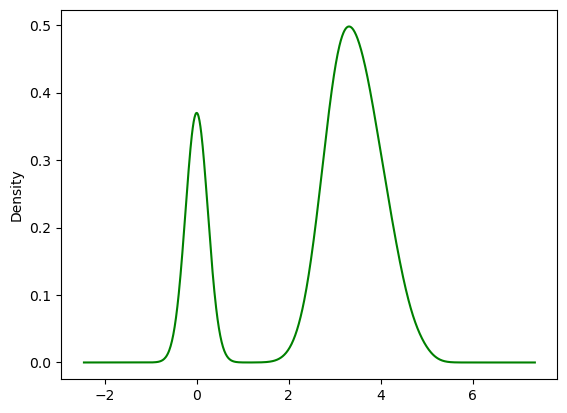

In [13]:
clean_data['Aggregate rating'].plot(kind='kde', color='green')

<Axes: xlabel='Rating text', ylabel='Votes'>

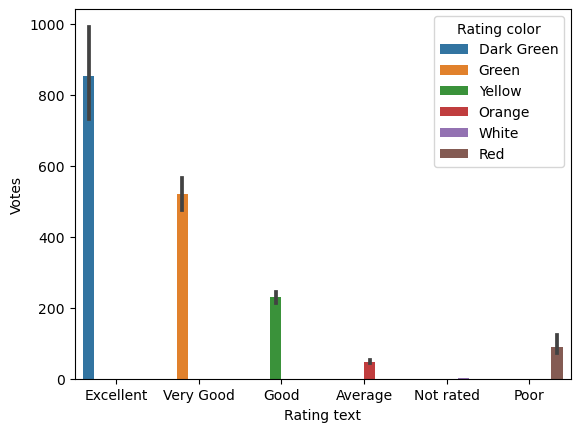

In [14]:
sns.barplot(x=clean_data["Rating text"],y=clean_data["Votes"],hue =clean_data["Rating color"])

<Axes: xlabel='Rating text'>

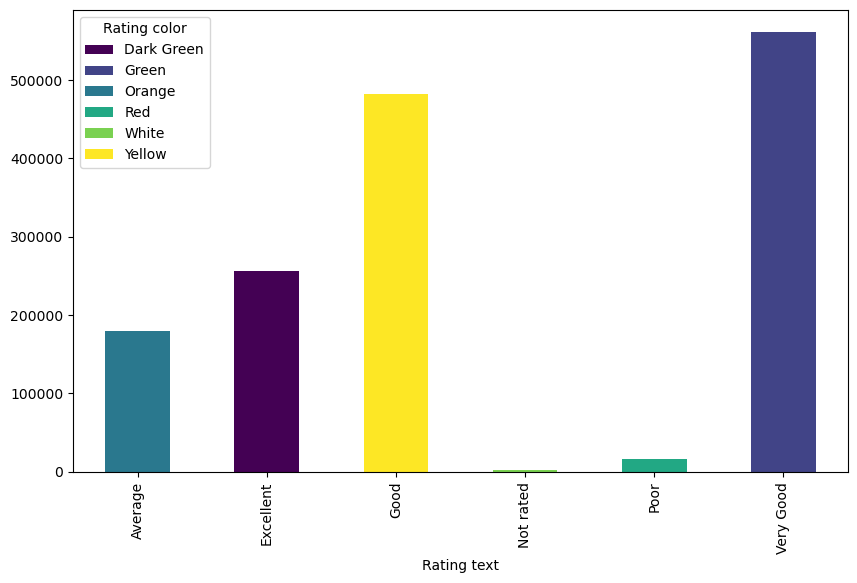

In [15]:
stacked_data = clean_data.groupby(['Rating text', 'Rating color'])['Votes'].sum().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

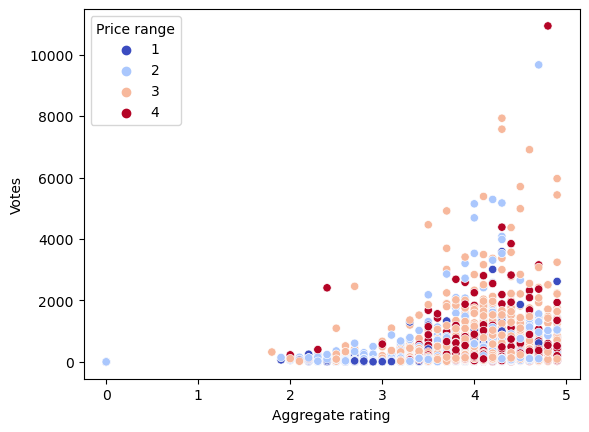

In [16]:
sns.scatterplot(x=clean_data["Aggregate rating"],y=clean_data["Votes"],palette="coolwarm",hue=clean_data["Price range"])

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
clean_data['Has Table booking'] = label_encoder.fit_transform(clean_data['Has Table booking'])
clean_data['Has Online delivery'] = label_encoder.fit_transform(clean_data['Has Online delivery'])
clean_data['Is delivering now'] = label_encoder.fit_transform(clean_data['Is delivering now'])
clean_data['Switch to order menu'] = label_encoder.fit_transform(clean_data['Switch to order menu'])
clean_data['Rating color'] = label_encoder.fit_transform(clean_data['Rating color'])
clean_data['Rating text'] = label_encoder.fit_transform(clean_data['Rating text'])



In [24]:
clean_data

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


C:\Users\Mpatt\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


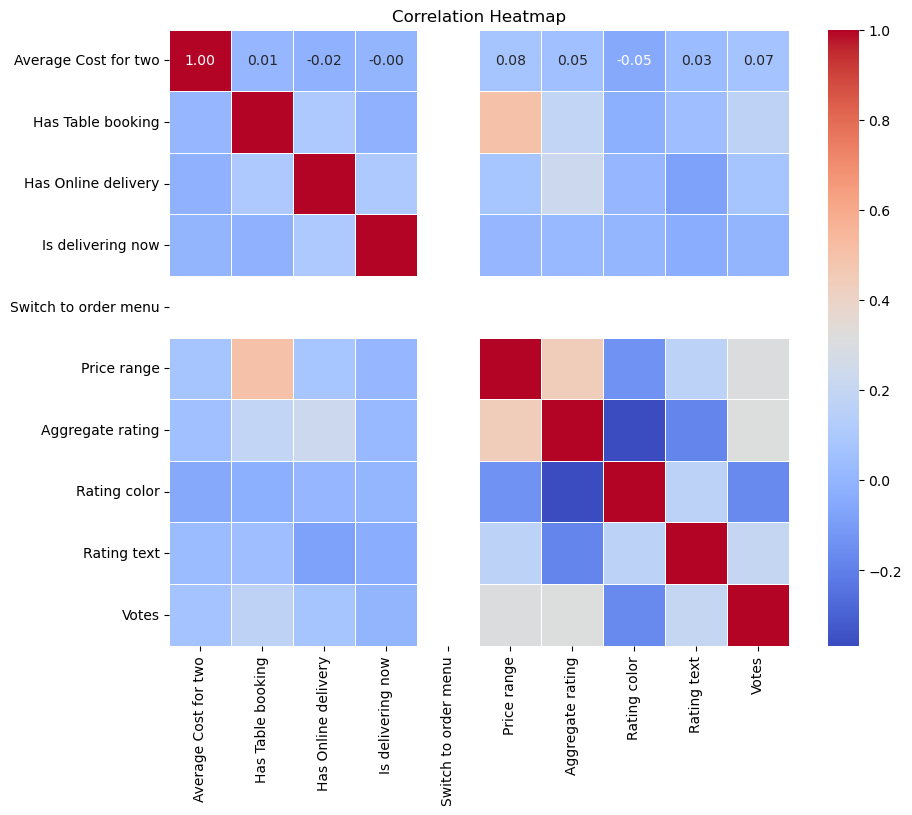

In [25]:
correlation_matrix = clean_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
'''clean_data = clean_data.columns.str.strip().str.lower().str.replace(' ', '_')
print(Clean_data.columns)'''


"clean_data = clean_data.columns.str.strip().str.lower().str.replace(' ', '_')\nprint(Clean_data.columns)"

In [20]:
#print(clean_data('aggregate_rating'))
# Handle categorical data
'''data= pd.get_dummies(clean_data, columns=['Cuisines', 'Country Code', 'City', 'Has Table booking',
                                  'Has Online delivery', 'Is delivering now', 'Rating color','Rating text'])'''


"data= pd.get_dummies(clean_data, columns=['Cuisines', 'Country Code', 'City', 'Has Table booking',\n                                  'Has Online delivery', 'Is delivering now', 'Rating color','Rating text'])"

In [ ]:
# Normalize numerical features
'''from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
numerical_features = ["Longitude", "Latitude", "Price range"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])


print(data)'''

In [27]:

# Define features and target variable
X = clean_data.drop(['Aggregate rating'],axis=1)
y = clean_data['Aggregate rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#print(X_train)
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.03439411474796049
R² Score: 0.9848890739000666


### The model shows great promise, with an MSE of 0.05, indicating highly accurate predictions and minimal errors. Additionally, an R² value of 0.98 suggests that the model does an excellent job of explaining and predicting the target variable. Overall, the Decision Tree Regressor model is performing exceptionally well on your test data, which is a positive sign for its effectiveness.